# Data Source

The UK Department for Transport's data files on UK road safety were used to create the dataset.The files have been taken from this link-https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data

# 1. Business Objective

In order to develop better vehicles, our client, a UK-based automaker, needs to create a forecast model to anticipate severity using information about the vehicle and the accident's specifics. Through this report, we are attempting to pinpoint the various variables that have been used as predictors, such as vehicle type, engine size, road surface condition, vehicle manoeuvre, first point of impact, day of the week, weather conditions, vehicle type, etc., that contribute to the various levels of accident severity seen in the UK in 2019. The purpose of this study is to develop predictive models that can select a group of significant characteristics that may be used to categorise the seriousness of an event and support a data analysis. Different machine learning methods are used to generate these models.

# 2. Preparing the enviornment and importing libraries for the model

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# 3.Data preparation and preprocessing 

In [2]:
#loading the dataset of accidents
df_acc = pd.read_csv("H://BIG data//coursework//dft-road-casualty-statistics-accident-2019.csv")
df_acc.head()

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2019010128300,2019,10128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,...,5,1,1,1,0,0,1,3,2,E01004762
1,2019010152270,2019,10152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,...,9,4,1,1,0,0,1,3,2,E01003117
2,2019010155191,2019,10155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000943
3,2019010155192,2019,10155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,...,0,4,1,1,0,0,1,1,2,E01000973
4,2019010155194,2019,10155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000546


In [3]:
#determining the dimensions of accident's dataset 
df_acc.shape

(117536, 36)

In [4]:
#loading vehicle's data set
df_veh = pd.read_csv("H://BIG data//coursework//dft-road-casualty-statistics-vehicle-2019.csv")
df_veh.head()

C:\ProgramData\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2019010128300,2019,10128300,1,9,0,99,9,9,99,...,6,1,58,9,-1,-1,-1,-1,2,1
1,2019010128300,2019,10128300,2,9,0,99,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,2,1
2,2019010152270,2019,10152270,1,9,0,18,9,9,99,...,6,2,24,5,-1,-1,-1,-1,3,1
3,2019010152270,2019,10152270,2,9,0,18,9,9,99,...,6,3,-1,-1,-1,-1,-1,-1,6,1
4,2019010155191,2019,10155191,1,9,0,3,5,1,0,...,6,1,45,7,-1,-1,-1,-1,4,1


In [5]:
#finding the dimensions of vehicle data 
df_veh.shape

(216381, 27)

In [6]:
#merging vehicle and accident datasets as we need data from both the variables and
#has been merged using the right join.
df = pd.merge(df_acc, df_veh, 
                   on='accident_index', 
                   how='right')

In [7]:
#finding the dimensions of merged dataset
df.shape

(216381, 62)

In [8]:
#showing first 5 rows of the merged data set
df.head()

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2019010128300,2019.0,10128300,528218.0,180407.0,-0.153842,51.508057,1.0,3.0,2.0,...,6,1,58,9,-1,-1,-1,-1,2,1
1,2019010128300,2019.0,10128300,528218.0,180407.0,-0.153842,51.508057,1.0,3.0,2.0,...,6,3,-1,-1,-1,-1,-1,-1,2,1
2,2019010152270,2019.0,10152270,530219.0,172463.0,-0.127949,51.436208,1.0,3.0,2.0,...,6,2,24,5,-1,-1,-1,-1,3,1
3,2019010152270,2019.0,10152270,530219.0,172463.0,-0.127949,51.436208,1.0,3.0,2.0,...,6,3,-1,-1,-1,-1,-1,-1,6,1
4,2019010155191,2019.0,10155191,530222.0,182543.0,-0.124193,51.526795,1.0,3.0,2.0,...,6,1,45,7,-1,-1,-1,-1,4,1


In [9]:
#showing total columns name in the merged dataset
df.columns

Index(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference', 'vehicle_type',
      

In [10]:
#deleting columns which are not needed for the model implementation
df = df.drop(['accident_index', 'accident_year_x', 'accident_reference_x',
       'location_easting_osgr', 'location_northing_osgr','number_of_vehicles',
       'number_of_casualties', 'date','time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number','speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'accident_year_y',
       'accident_reference_y', 'vehicle_reference','towing_and_articulation','vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane','police_force', 'junction_location','hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway','vehicle_left_hand_drive',
       'journey_purpose_of_driver','age_of_driver','propulsion_code',
       'age_of_vehicle', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type','sex_of_driver','age_band_of_driver','skidding_and_overturning'],axis = 1)

Columns that are not necessary to develop the model have been removed through data analysis in accordance with the domain research, leaving just those attributes that are required for the prediction.

In [11]:
#printing first 5 rows excluding dropped columns
df.head()

,longitude,latitude,accident_severity,day_of_week,road_type,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc
0,-0.153842,51.508057,3.0,2.0,1.0,1.0,1.0,9,99,4,-1
1,-0.153842,51.508057,3.0,2.0,1.0,1.0,1.0,9,99,9,-1
2,-0.127949,51.436208,3.0,3.0,2.0,1.0,1.0,9,18,1,-1
3,-0.127949,51.436208,3.0,3.0,2.0,1.0,1.0,9,18,9,-1
4,-0.124193,51.526795,3.0,3.0,6.0,1.0,1.0,9,3,2,-1


In [12]:
#determining the size of the merged dataset after dropping the columns which aren't needed
df.shape

(216381, 11)

In [13]:
#Replacing values of the variable as per meta data document 
df.accident_severity = df.accident_severity.replace([1,2,3], ['Fatal', 'Serious', 'Slight'])
df.road_type = df.road_type.replace([1,2,3,6,7,12,9],['Roundabout','One way street','Dual carriageway','Single carriageway','Slip road','One way street/Slip road','unknown'])
df.day_of_week = df.day_of_week.replace([1,2,3,4,5,6,7],['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
df.weather_conditions = df.weather_conditions.replace([1,2,3,4,5,6,7,8,9],['Fine no high winds','Raining no high winds','Snowing no high winds','Fine + high winds','Raining + high winds',
                                                                          'Snowing + high winds','Fog or mist','Other','unknown'])
df.vehicle_type = df.vehicle_type.replace([1,2,3,4,5,8,9,10,11,16,17,18,19,20,21,22,23,90,97,98,99,103,104,105,106,108,109,110,113],['cycle','Motorcycle','Motorcycle','Motorcycle','Motorcycle','car','car','bus','bus','others','goods vehicle','goods vehicle','goods vehicle','goods vehicle','goods vehicle','Motorcycle','Motorcycle','others','Motorcycle','goods vehicle','others','Motorcycle','Motorcycle','Motorcycle','Motorcycle','car','car','bus','good vehicle'])
df.vehicle_manoeuvre = df.vehicle_manoeuvre.replace([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,99],['reversing','parked','stopping','stopping','moving','turning','turning','turning','turning','turning','changing lane','changing lane','overtaking',
                                                                                                      'overtaking','overtaking','overtaking','overtaking','overtaking','unknown'])
df.first_point_of_impact = df.first_point_of_impact.replace([0,1,2,3,4,9],['no impact','front','back','offside','nearside','unknown'])
df.road_surface_conditions = df.road_surface_conditions.replace([1,2,3,4,5,6,7,9],['dry','wet','snow','Frost','Flood','oil/diesel','mud','unknown'])


According to the meta data document, several of these columns'(accident_severity, road_type, day_of_week, weather_conditions, vehicle_type, vehicle_manoeuvre, first_point_of_impact and road_surface_conditions) numerical values have been swapped out for categorical values to make the data more descriptive and transparent. There were several categories in many variables and has been brought down to less number of categories such as in vehicle type, there were around 29 categories like motorcycle with 250cc, motorcycle with 150cc, electric motorcycle which have been categorised as Motocycle. This had also changed the datatype from interger to object(string). 

In [15]:
#printing values after altering the values to categorical data
df.head()

,longitude,latitude,accident_severity,day_of_week,road_type,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc
0,-0.153842,51.508057,Slight,Monday,Roundabout,Fine no high winds,dry,car,unknown,nearside,-1
1,-0.153842,51.508057,Slight,Monday,Roundabout,Fine no high winds,dry,car,unknown,unknown,-1
2,-0.127949,51.436208,Slight,Tuesday,One way street,Fine no high winds,dry,car,overtaking,front,-1
3,-0.127949,51.436208,Slight,Tuesday,One way street,Fine no high winds,dry,car,overtaking,unknown,-1
4,-0.124193,51.526795,Slight,Tuesday,Single carriageway,Fine no high winds,dry,car,stopping,back,-1


-1 refers to the missing values in the dataset and as the dataset contains about 216000 observations ,so the missing values were converted to null and values and have been dropped.

In [17]:
#replacing every data having '-1' value with NaN in the dataset 
df = df.replace(-1,np.NaN)

In [18]:
#identifying the total number of null values in each column 
df.isnull().sum()

longitude                  40767
latitude                   40767
accident_severity          40716
day_of_week                40716
road_type                  40716
weather_conditions         40716
road_surface_conditions    41184
vehicle_type                 259
vehicle_manoeuvre            592
first_point_of_impact        781
engine_capacity_cc         54958
dtype: int64

In [19]:
#deleting null values 
df = df.dropna()

According to an analysis of the metadata, the values for the -1 labels for categories are unknown or missing. Therefore, all such values are replaced by NaN and then dropped such values.

In [20]:
#identifying shape of the dataset after deleting null values
df.shape

(129054, 11)

## Stratified sampling

In [17]:
#counting the number of accidents as per severity classes
df.accident_severity.value_counts()

Slight     140887
Serious     32236
Fatal        2542
Name: accident_severity, dtype: int64

Text(0.5, 0, 'Severity')

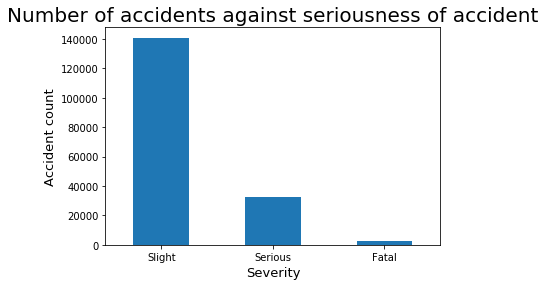

In [18]:
#plotting bar graph between accident severity and number of accidents 
df["accident_severity"].value_counts().plot(kind="bar", rot=0)
plt.title('Number of accidents against seriousness of accident' , fontsize= 20)
plt.ylabel('Accident count' , fontsize = 13)
plt.xlabel('Severity', fontsize = 13)

Here, it can be seen that the bulk of accidents that happened in 2019 had a mild severity, totalling 140887, while the number of fatal accidents was relatively low, at 2542.

In [21]:
#Splitting dataset into train and test instances
train_set,test_set = train_test_split(df, test_size=0.2, random_state=7,stratify=df["accident_severity"])
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

103243 train and 25811 test instances


# EXPLORATORY DATA ANALYSIS

In [22]:
#The data set contained unknown values which have been dropped from the train set
train_set = train_set[~train_set.isin(['unknown']).any(axis=1)]

In [23]:
#identifying the size of train set
train_set.shape

(95169, 11)

In [24]:
##The data set contained unknown values which have been dropped from the test set
test_set = test_set[~test_set.isin(['unknown']).any(axis=1)]

In [25]:
#finding shape of test set
test_set.shape

(23790, 11)

In [26]:
#describing information including column name, count of non null values in each column and their data type for train_set 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95169 entries, 174130 to 100784
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                95169 non-null  float64
 1   latitude                 95169 non-null  float64
 2   accident_severity        95169 non-null  object 
 3   day_of_week              95169 non-null  object 
 4   road_type                95169 non-null  object 
 5   weather_conditions       95169 non-null  object 
 6   road_surface_conditions  95169 non-null  object 
 7   vehicle_type             95169 non-null  object 
 8   vehicle_manoeuvre        95169 non-null  object 
 9   first_point_of_impact    95169 non-null  object 
 10  engine_capacity_cc       95169 non-null  float64
dtypes: float64(3), object(8)
memory usage: 8.7+ MB


# Descriptive Statistics

In [27]:
#describing categorical variable in the train set
train_set.describe(exclude = ['float', 'int64']) 

,accident_severity,day_of_week,road_type,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,first_point_of_impact
count,95169,95169,95169,95169,95169,95169,95169,95169
unique,3,7,5,8,5,5,7,5
top,Slight,Friday,Single carriageway,Fine no high winds,dry,car,overtaking,front
freq,75263,15804,69164,77259,66369,76620,55149,49357


The statistical description of categorical values show that friday was the day when most of the accidents had taken place with high winds and dry surface condition. Most of the accidnets had taken place because of overtaking and the first point of contact for most of the vehicles was the front side.

In [28]:
#showing the stastical analysis of engine_capcity_cc column 
train_set['engine_capacity_cc'].describe()

count    95169.000000
mean      1856.143429
std       1617.282103
min          2.000000
25%       1242.000000
50%       1596.000000
75%       1995.000000
max      29980.000000
Name: engine_capacity_cc, dtype: float64

As engine capacacity is a continuous variable, it has been separately statistically analysed. We can infer that most of the vehicles involved in the accidents were of the capacity 1856 cc. The maximum engine capacity as found to be 29980 suggest that it could be an expensive car involved in the accident such as sports car,SUV, high end luxury cars. The minimum engine capacity is of 2cc which is a non realsitic data and thus, had to be removed. There were a total of 95169 engines involved in the accident suggests that there could be various type of automotive involved such as cars, buses, motorcycles, goods vehicles etc.

## VISUALIZATIONS

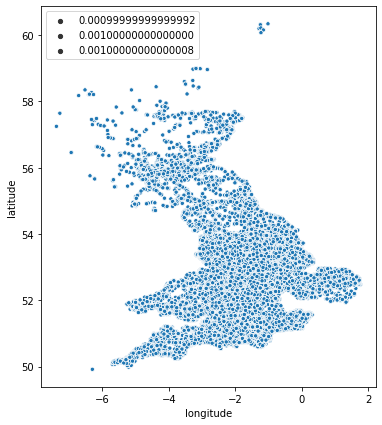

In [29]:
#constructing plot between longitute and latitude 
plt.rcParams['figure.figsize'] = (6, 7)
sns.scatterplot(x=train_set['longitude'], y=train_set['latitude'], size=0.001)

In [30]:
train_set['accident_severity'].value_counts()

Slight     75263
Serious    18269
Fatal       1637
Name: accident_severity, dtype: int64

It can be observed that the majority of accidents took place in the longitude region from -3 to -1 and latitude region from 52 to 54. 

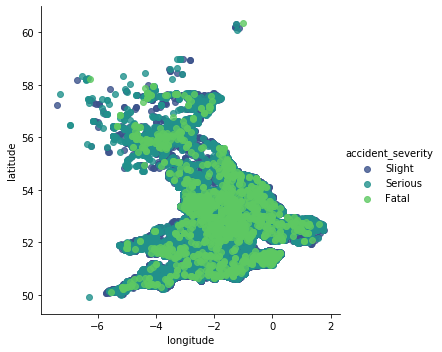

In [31]:
#importing library which uses Matplotlib to plot graphs
import seaborn as sns
sns.lmplot('longitude', 'latitude', data=train_set, hue='accident_severity', fit_reg=False, palette="viridis")
plt.show()

The plot depicts the accidents that had happened across UK in 2019.It is evident that most accidents have less severity and have been categorised as slight where as the severity of high seriousness which could involve deaths have been categorised as fatal that is the least frequent.There is an other category of accidents called serious that has been overlapped by fatal in the plot which is about 17000.

## Visualising count of accidents against vehicle type

Text(0.5, 0, 'Vehicle type')

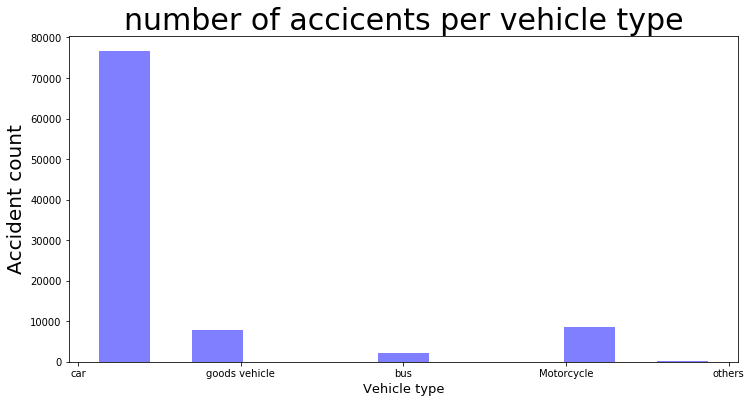

In [32]:
#plotting graph between counts of accident and type of vehicle 
plt.figure(figsize=(12,6))
train_set.vehicle_type.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('number of accicents per vehicle type' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('Vehicle type', fontsize = 13)

The bar plot shows that the majority of accidents, or about 77000 of them, have involved cars. On the other hand, only a small number of motorcycle and goods vehicle were involed in the accident, which contribute to about 7000 and 10,000 accidents, respectively. Contrarily, accidents involving other vehicles are rather insignificant.

## Visualising count of accidents against the day of a week

Text(0.5, 0, 'Day of the week')

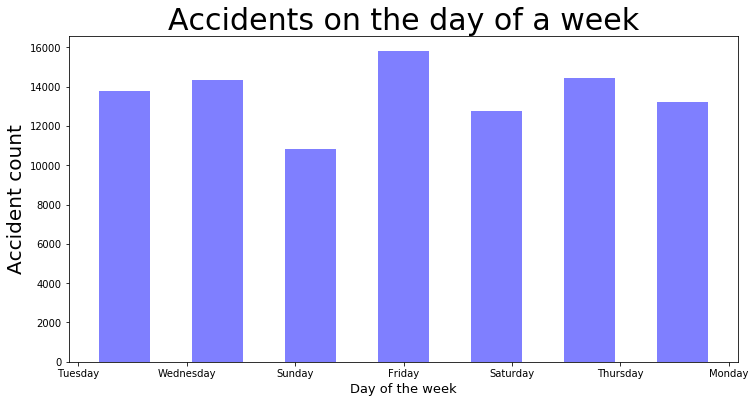

In [33]:
#plotting graph between number of accidents and day of the week
plt.figure(figsize=(12,6))
train_set.day_of_week.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Accidents on the day of a week' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('Day of the week', fontsize = 13)

Although the graph above gives the impression that accidents occur every day of the week at roughly the same rate, the day with the most accidents is Friday which accounts around 15500 accidents, closely followed by Wednesday and Thursday. Sunday is the day with the fewest accidents.on sunday has the lowest number of accidents suggesting that less number of people go out on holidays.

## Visualising count of accidents against the engine capacity

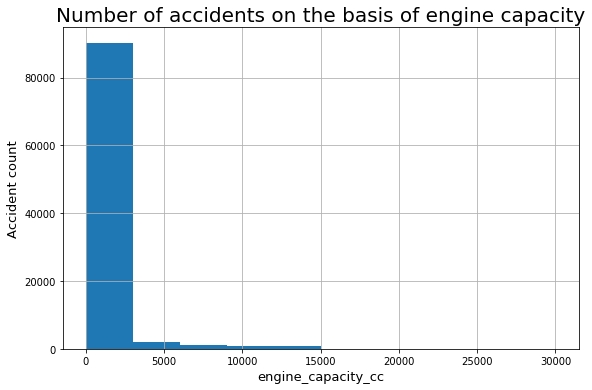

In [34]:
#creating a plot between accident count and engine capacity cc 
train_set['engine_capacity_cc'].hist(figsize=(8,5))
plt.tight_layout()
plt.title('Number of accidents on the basis of engine capacity' , fontsize= 20)
plt.ylabel('Accident count' , fontsize = 13)
plt.xlabel('engine_capacity_cc', fontsize = 13)
plt.show()

It is evident from the graph above that more accidents involved the vehicles with the smallest engine sizes. For vehicles with more than 2500 CC, there has been a significant decrease in accidents. The graph has a right skew. For vehicles with an engine capacity of 15,000 or more, there have been no accidents.This also suggests that there are outliers in the data and also a transformation has to be applied.

## Visualizing count of accident against accident severity and road type

Text(0.5, 0, 'Road type')

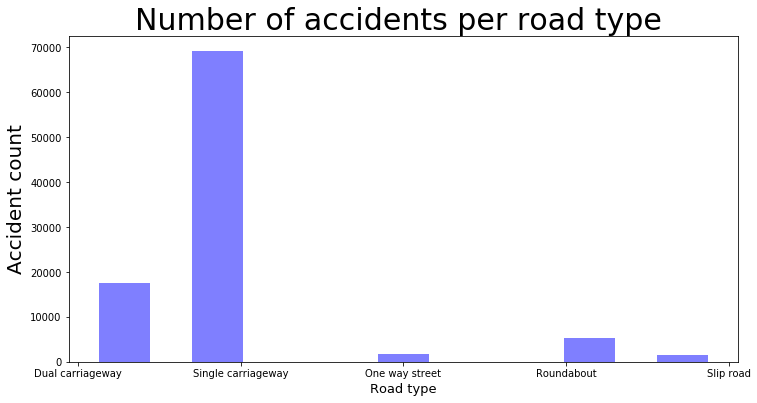

In [35]:
#plotting bar graph between accident count and road type
plt.figure(figsize=(12,6))
train_set.road_type.hist(bins=7,rwidth=0.55,alpha=0.5, color= 'blue')
plt.title('Number of accidents per road type ' , fontsize= 30)
plt.grid(False)
plt.ylabel('Accident count' , fontsize = 20)
plt.xlabel('Road type', fontsize = 13)

The graph below shows that most number of accidents occur on single-carriageways, which are particularly risky, since there is no separation between vehicles travelling in opposite directions. Additionally, it can be observed that majority of the severity cases fall under Slight category in all kinds of road type.

In [36]:
# to visualize categorical values against target variable, a new varibale was created 
# to store 'accident_severity','longitude','latitude','engine_capacity_cc'
other_cols = [x for x in train_set.columns.tolist() if x not in ['accident_severity','longitude','latitude','engine_capacity_cc']]
cols_horiz = ['day_of_week']

<Figure size 720x360 with 0 Axes>

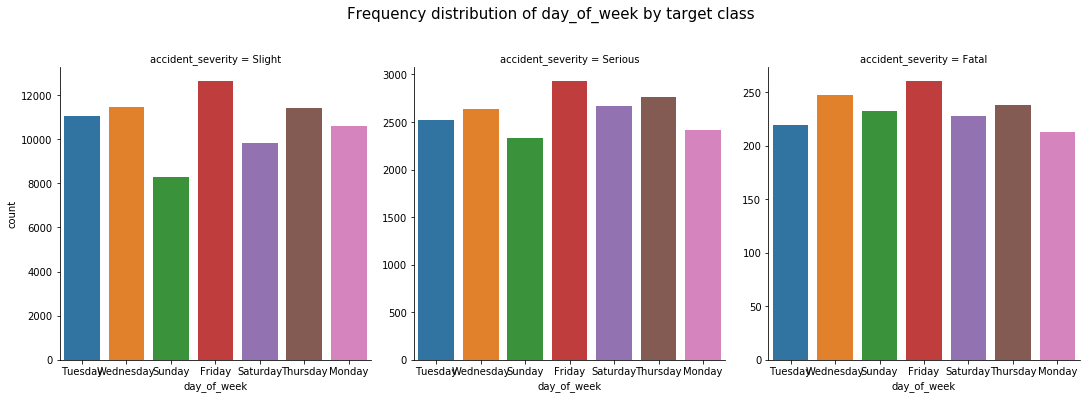

<Figure size 720x360 with 0 Axes>

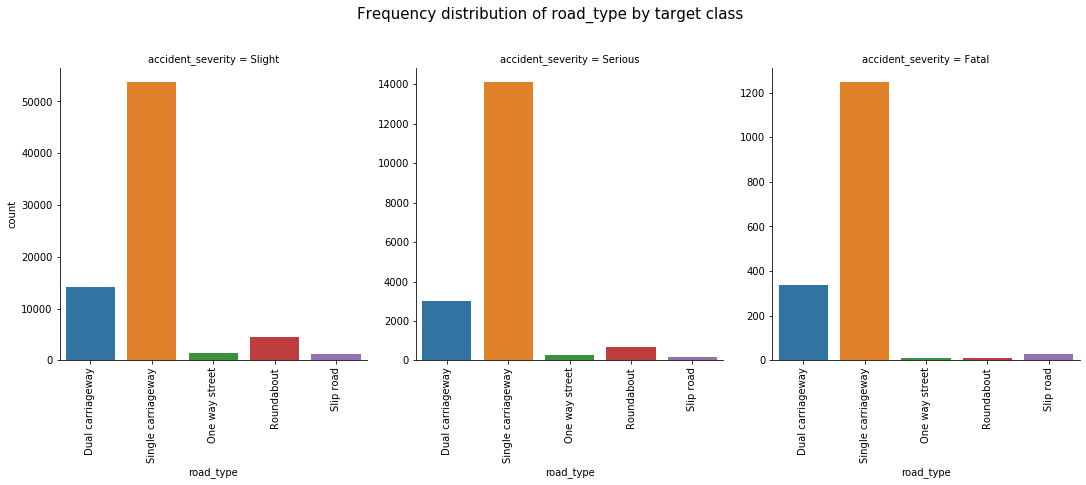

<Figure size 720x360 with 0 Axes>

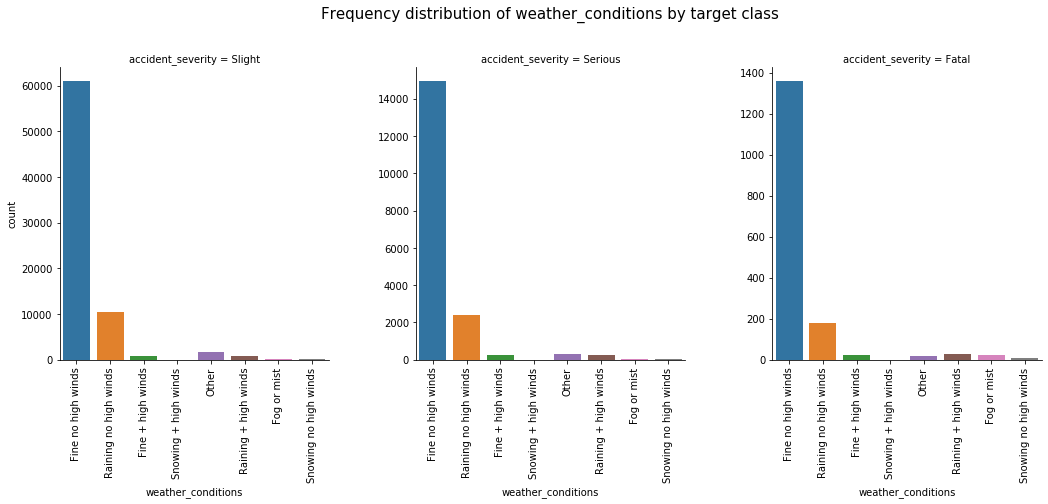

<Figure size 720x360 with 0 Axes>

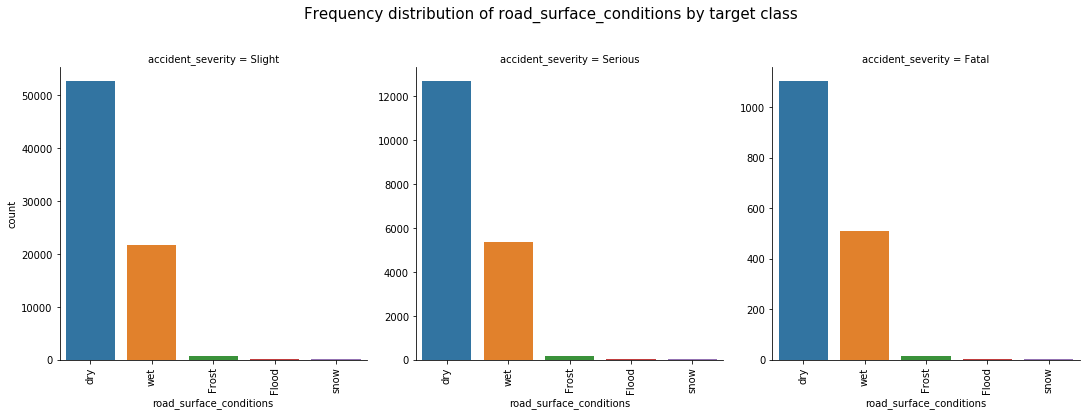

<Figure size 720x360 with 0 Axes>

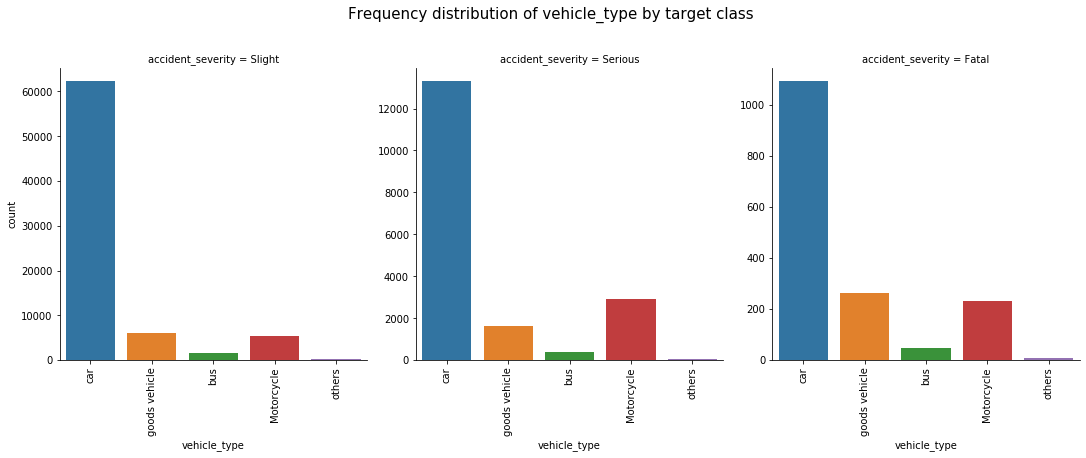

<Figure size 720x360 with 0 Axes>

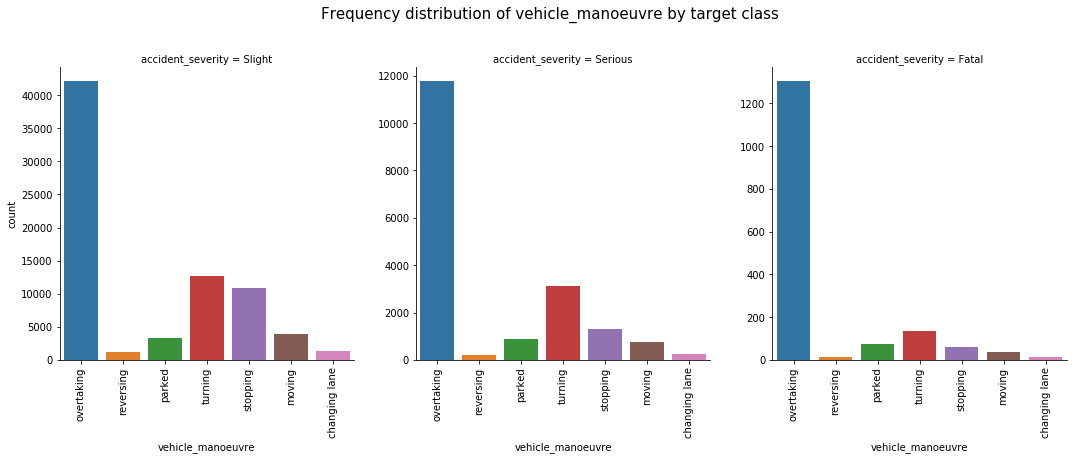

<Figure size 720x360 with 0 Axes>

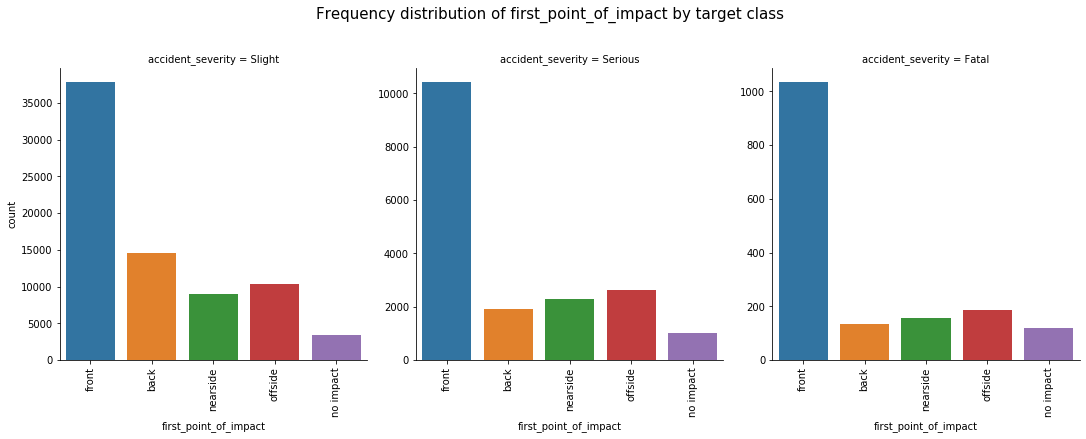

In [37]:
# comparing various train dataset characteristics with the target variable, accident severity usinng visualization
for cols in other_cols:
    plt.figure(figsize = (10, 5))
    category_plot = sns.catplot(data = train_set, x =cols, col = 'accident_severity', kind = 'count', sharey = False)
    if cols not in cols_horiz:
        category_plot.set_xticklabels(rotation = 90)
    plt.suptitle("Frequency distribution of {} by target class".format(cols), y = 1.1, fontsize = 15)
    plt.show()

The plotted graphs show that accidents happen every day but that Friday saw the bulk of incidents in all three severity classes. In comparison to other routes, the number of accidents on the single carriageway was notably high for all severity levels. Additionally, it is noted that the weather conditionss with the most number of accidents occurred was one with pleasant weather and no strong winds, whereas the number of accidents where weather condition was rainy with no winds had second most accidents involved in all the three categories of severity,suggesting that visiblity and skidding could be a reason for accidents and thus an upgrade in windsceen, tyres and breaking system is required. Surprisingly, dry road surfaces are second in importance to wet ones as major contributors to accidents, suggest that skidding could be a cause of accidents. Snowy, rainy, and icy surface don't have a big impact on accidents. Overall, it is clear that the majority of car accidents are caused while overtaking,when the climate conditions were fine on and dry or wet surface condition, and most of the vehicles have collided from the front as the distribution of impact shows in all three severity levels and also suggest that vehicles need a stronger front part with advanced breaking system.

In [38]:
#dropping latitude and longitude from test and train dataset
train_set = train_set.drop(['longitude','latitude'],axis = 1)
test_set = test_set.drop(['longitude','latitude'],axis = 1)

# Outlier detection 

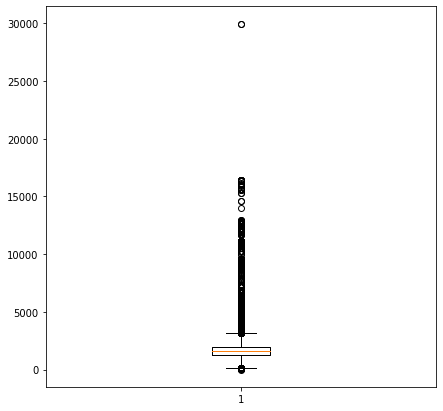

In [39]:
fig = plt.figure(figsize =(7, 7))
 
# Creating box plot for engine_capacity 
plt.boxplot(train_set['engine_capacity_cc'])
 
# show plot
plt.show()

In [40]:
#calculating the lower bound and upper bound for for engine capacity to remove outliers from trainset
# and removing the outliers.
Q1=train_set['engine_capacity_cc'].quantile(0.25)
Q3=train_set['engine_capacity_cc'].quantile(0.75)
IQR=Q3-Q1
lowqe_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print(lowqe_bound,upper_bound)
train_set = train_set[(train_set["engine_capacity_cc"] < upper_bound) & (train_set["engine_capacity_cc"] > lowqe_bound)]
print(f" trainset, rows and columns{train_set.shape}") 

112.5 3124.5
 trainset, rows and columns(89416, 9)


In [41]:
#Removing the outliers from testing set
Qt1=test_set['engine_capacity_cc'].quantile(0.25)
Qt3=test_set['engine_capacity_cc'].quantile(0.75)
IQR1=Qt3-Qt1
lowqe_bound1=Qt1 - 1.5 * IQR1
upper_bound1=Qt3 + 1.5 * IQR1
print(lowqe_bound1,upper_bound1)
test_set = test_set[(test_set["engine_capacity_cc"] < upper_bound1) & (test_set["engine_capacity_cc"] > lowqe_bound1)]
print(f" testset, rows and columns{test_set.shape}") 

127.5 3115.5
 testset, rows and columns(21306, 9)


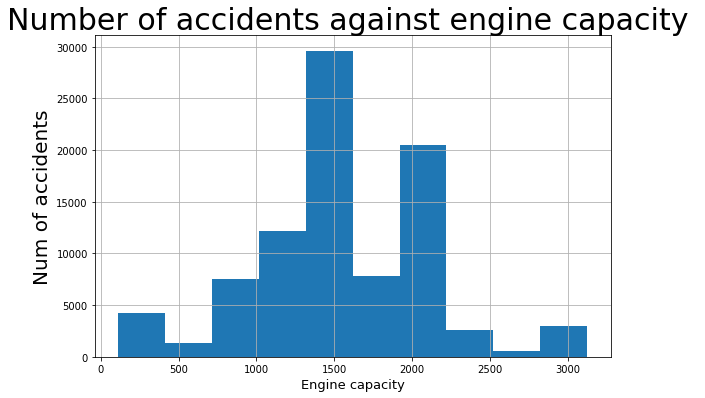

In [42]:
#plotting the graph of engine capacity against number of accidents after removing outliers
train_set['engine_capacity_cc'].hist(figsize=(8,5))
plt.tight_layout()
plt.title('Number of accidents against engine capacity ' , fontsize= 30)
plt.ylabel('Num of accidents' , fontsize = 20)
plt.xlabel('Engine capacity', fontsize = 13)
plt.show()


The histogram displays a symmetrical distribution of data. When variables' values exist at predictable frequencies and frequently at the same location, the distribution is said to be symmetrical. It can be observed that most of the accidents took place by the vehicle having engine capacity 1500 CC.

In [43]:
from sklearn.preprocessing import OneHotEncoder


def get_dummies(trainset, testset, old_col_name):
    """If you have a trainset, a testset, and the name of a column 
       that contains a categorical variable, you can fit an encoder 
       to the trainset and use it to insert dummy columns further into trainset and testset.
    """
    
    one_hot_encoder = OneHotEncoder(drop="first", sparse=False)
    
    #The column is taken, the values are extracted, and the array 
    # is reshaped to be 2-d because the input to the encoder needs to be a 2-d numpy array.
    cat_vals = trainset[old_col_name].values.reshape(-1,1)

    
    #  output is new nummpy array 
    transformed = one_hot_encoder.fit_transform(cat_vals)
    

    new_col_names = one_hot_encoder.categories_[0].tolist()[1:]
    
    for i, new_col_name in enumerate(new_col_names):
        
        # including columns of transformed data in a trainset
        trainset[new_col_name] = transformed[:,i]
    
    # using fitted encoder fot transforming testset 
    
    cat_vals = testset[old_col_name].values.reshape(-1,1)
    transformed = one_hot_encoder.transform(cat_vals)

    for i, new_col_name in enumerate(new_col_names):
        
        # including columns of transformed data in a testset
        testset[new_col_name] = transformed[:,i]
    
    return trainset, testset


for col_name in ["day_of_week", "road_type","weather_conditions","road_surface_conditions","vehicle_type","vehicle_manoeuvre","first_point_of_impact"]:
    trainset, testset = get_dummies(train_set, test_set, col_name)

# checking for dummies in trainset  
trainset.head()

,accident_severity,day_of_week,road_type,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,Monday,...,moving,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside
174130,Slight,Tuesday,Dual carriageway,Fine no high winds,dry,car,overtaking,front,1896.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45542,Slight,Wednesday,Single carriageway,Fine no high winds,dry,car,overtaking,front,2143.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72453,Slight,Sunday,Single carriageway,Fine no high winds,dry,car,overtaking,back,1587.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171197,Serious,Friday,Single carriageway,Fine no high winds,dry,car,overtaking,front,1984.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
52153,Serious,Friday,Single carriageway,Fine no high winds,dry,car,overtaking,front,1398.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [44]:
# checking for dummies in trainset
testset.head()

,accident_severity,day_of_week,road_type,weather_conditions,road_surface_conditions,vehicle_type,vehicle_manoeuvre,first_point_of_impact,engine_capacity_cc,Monday,...,moving,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside
26268,Slight,Thursday,Single carriageway,Fine no high winds,dry,car,overtaking,nearside,2400.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32658,Slight,Sunday,Single carriageway,Fine no high winds,dry,car,overtaking,front,1360.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
99162,Slight,Wednesday,Single carriageway,Fine no high winds,dry,car,moving,front,1395.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130811,Slight,Tuesday,Single carriageway,Fine no high winds,dry,car,stopping,front,1995.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
72030,Slight,Wednesday,Single carriageway,Fine no high winds,dry,car,overtaking,offside,1968.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
#dropping columns after creating dummy variables as it is not required in the data
cols_to_drop = ["day_of_week","road_type","weather_conditions","road_surface_conditions","vehicle_type","vehicle_manoeuvre","first_point_of_impact"]
trainset.drop(columns=cols_to_drop, inplace=True)
testset.drop(columns=cols_to_drop, inplace=True)

In [46]:
#dimensions of test set after dropping columns
trainset.shape

(89416, 37)

The train set has 23790 rows and 37 columns.

## FEATURE SCALING

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# removing target variable before scaling
trainset_tgt = trainset["accident_severity"].values
trainset_preds = trainset.drop("accident_severity", axis=1)

# putting back the numpy array, returned from fit_transform into dataframe
scaled_vals = scaler.fit_transform(trainset_preds)
trainset = pd.DataFrame(scaled_vals, columns=trainset_preds.columns)

# joining the non-scale target back
trainset['accident_severity'] = trainset_tgt

# inspect the data
trainset.head()

,engine_capacity_cc,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,One way street,Roundabout,Single carriageway,...,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside,accident_severity
0,0.589525,-0.400334,-0.395847,-0.362695,-0.421568,2.439773,-0.420169,-0.131987,-0.242573,-1.646832,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Slight
1,1.031392,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Slight
2,0.036743,-0.400334,-0.395847,2.757141,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,-0.36908,-0.201955,-0.402287,Slight
3,0.746951,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Serious
4,-0.301366,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.36908,-0.201955,-0.402287,Serious


In [48]:
testset_tgt = testset["accident_severity"].values
testset_preds = testset.drop("accident_severity", axis=1)

scaled_vals = scaler.transform(testset_preds)
testset = pd.DataFrame(scaled_vals, columns=testset_preds.columns)

# put the non-scaled target back in
testset['accident_severity'] = testset_tgt

testset.head()

,engine_capacity_cc,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,One way street,Roundabout,Single carriageway,...,overtaking,parked,reversing,stopping,turning,front,nearside,no impact,offside,accident_severity
0,1.491149,-0.400334,-0.395847,-0.362695,2.372097,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,2.709436,-0.201955,-0.402287,Slight
1,-0.369346,-0.400334,-0.395847,2.757141,-0.421568,-0.409874,-0.420169,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
2,-0.306733,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,-1.172385,-0.217475,-0.121083,-0.383663,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
3,0.766630,-0.400334,-0.395847,-0.362695,-0.421568,2.439773,-0.420169,-0.131987,-0.242573,0.607226,...,-1.172385,-0.217475,-0.121083,2.606454,-0.453704,0.954959,-0.369080,-0.201955,-0.402287,Slight
4,0.718328,-0.400334,-0.395847,-0.362695,-0.421568,-0.409874,2.379996,-0.131987,-0.242573,0.607226,...,0.852962,-0.217475,-0.121083,-0.383663,-0.453704,-1.047166,-0.369080,-0.201955,2.485785,Slight


In [49]:
train_set.shape

(89416, 37)

# CONCLUSION

Using the accident and vehicle dataset a new dataframe was created by merging.The new dataset was preprocessed, cleaned.EDA was performed which included visualizing various plots and understanding the predictors and their relation with the target varibale that we had chosen.We had also performed featured engineering and featuring scaling and later had converted it to a csv file which has been used in the individual assignment.

In [50]:
#Converting the train and test set to csv files
trainset.to_csv('trainset.csv')
testset.to_csv('testset.csv')